In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, auc, mean_squared_error

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

# Data visualization
### Sex (Gender)

<Axes: title={'center': 'Histogram'}, xlabel='Gender', ylabel='Total'>

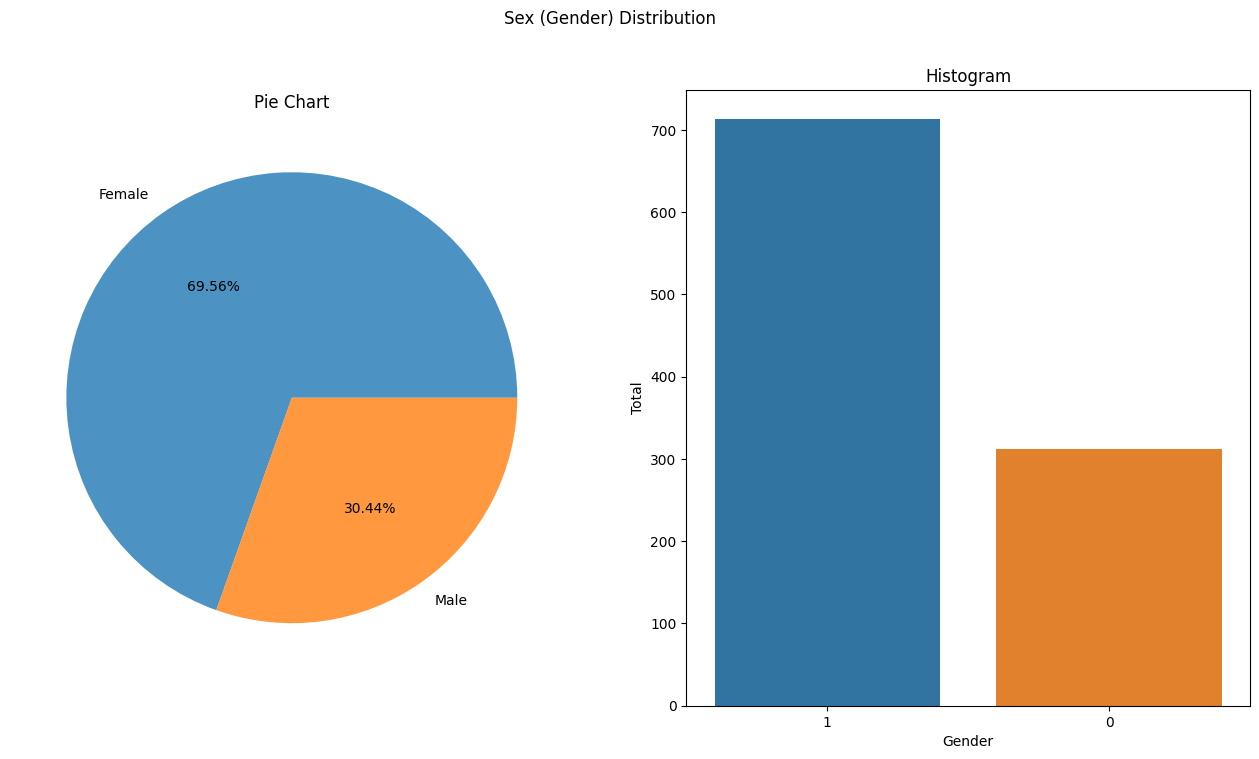

In [7]:
labels=['Female', 'Male']
order=df['sex'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender) Distribution')

# subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))

# subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax=sns.countplot(x='sex',data=df,order=order)
plt.xlabel('Gender')
plt.ylabel('Total')
countplt

### CP (Chest Pain Types)

<Axes: title={'center': 'Histogram'}, xlabel='Pain Type', ylabel='Total'>

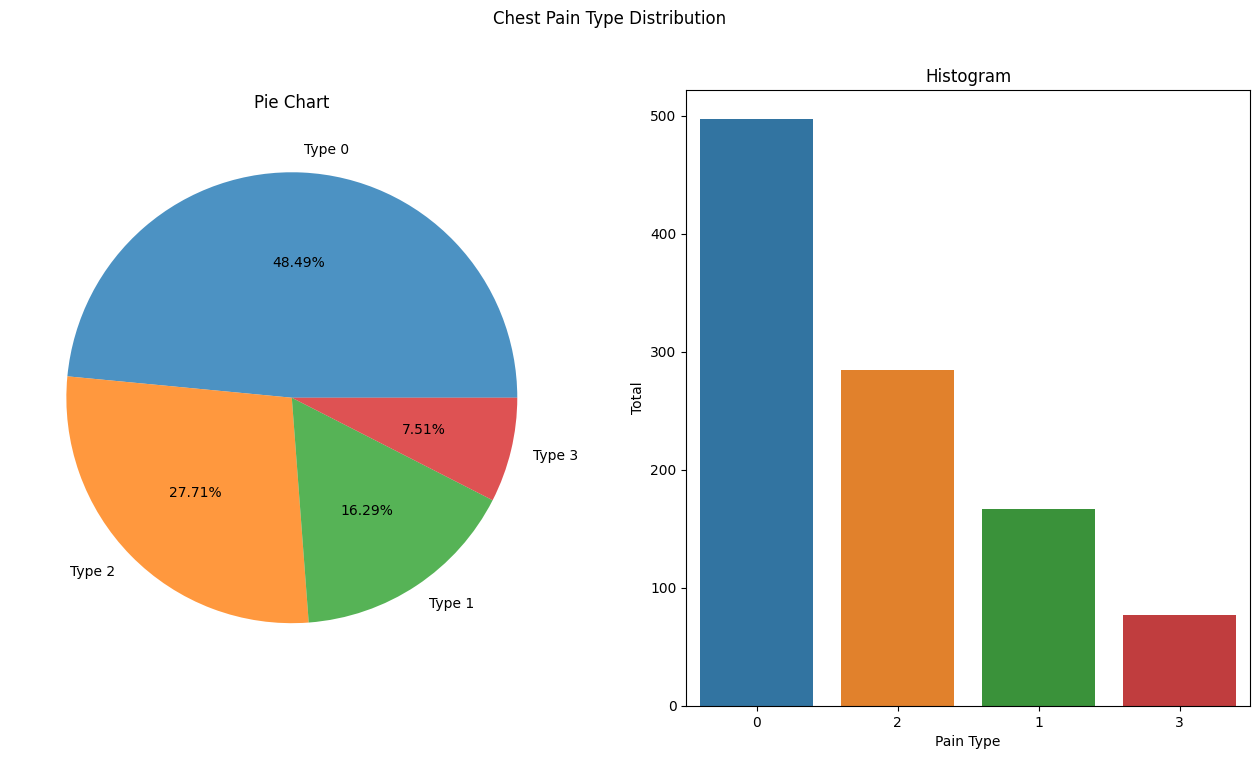

In [ ]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Chest Pain Type Distribution')

# subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['cp'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))

# subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='cp',data=df,order=order)
plt.xlabel('Pain Type')
plt.ylabel('Total')
countplt

fbs (Fasting Blood Sugar)

<Axes: title={'center': 'Histogram'}, xlabel='Fasting Blood Sugar', ylabel='Total'>

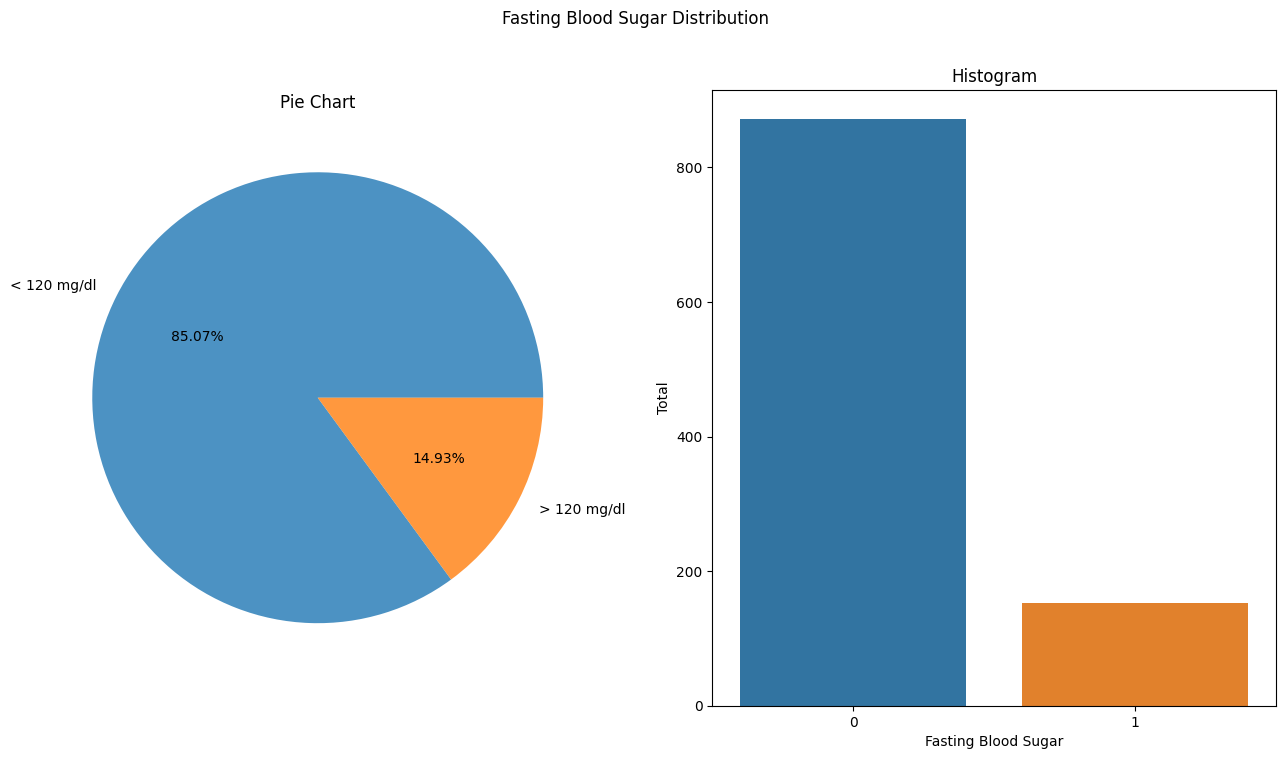

In [ ]:
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Fasting Blood Sugar Distribution')

# subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))


# subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='fbs',data=df,order=order)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
countplt

restecg (Resting Electrocardiographic Results)

<Axes: title={'center': 'Histogram'}, xlabel='Resting  Electrocardiographic', ylabel='Total'>

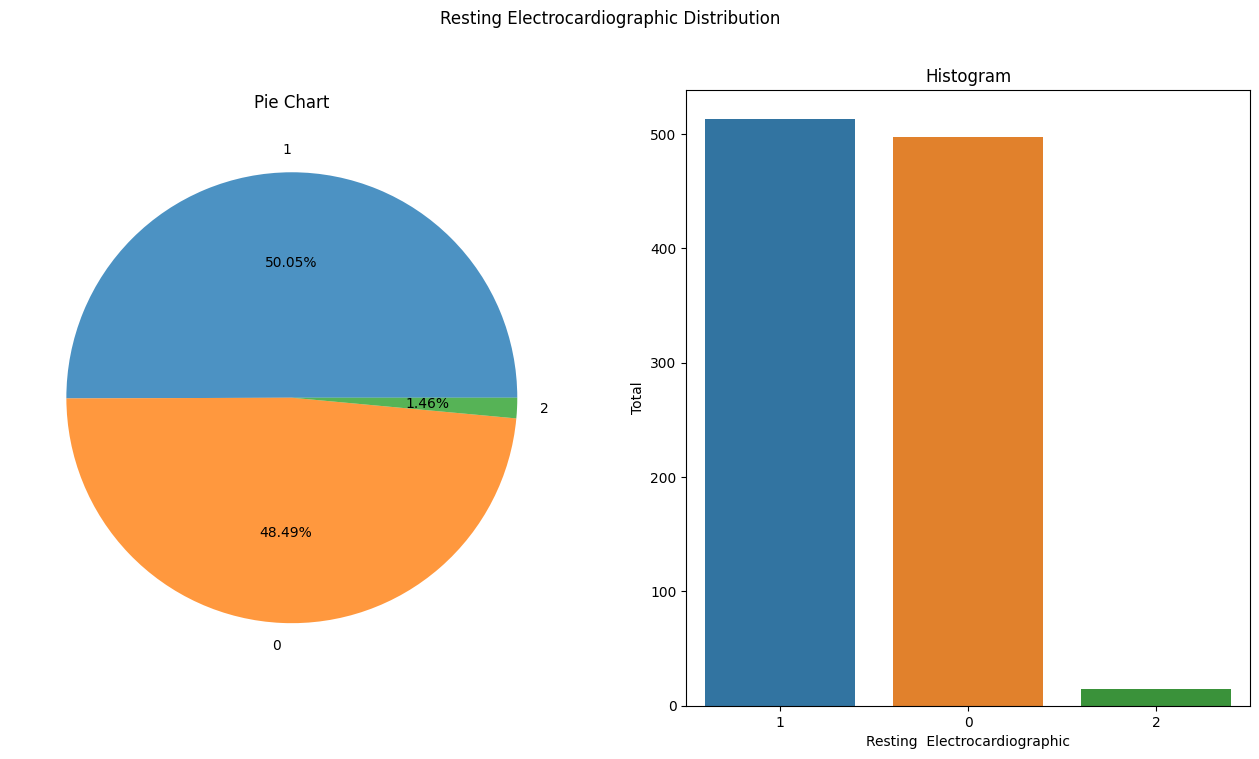

In [ ]:
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Resting Electrocardiographic Distribution')

#subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['restecg'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))

#subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='restecg',data=df,order=order)
plt.xlabel('Resting  Electrocardiographic')
plt.ylabel('Total')
countplt

### exang (Exercise Induced Angina)

<Axes: title={'center': 'Histogram'}, xlabel='Exercise Induced Angina', ylabel='Total'>

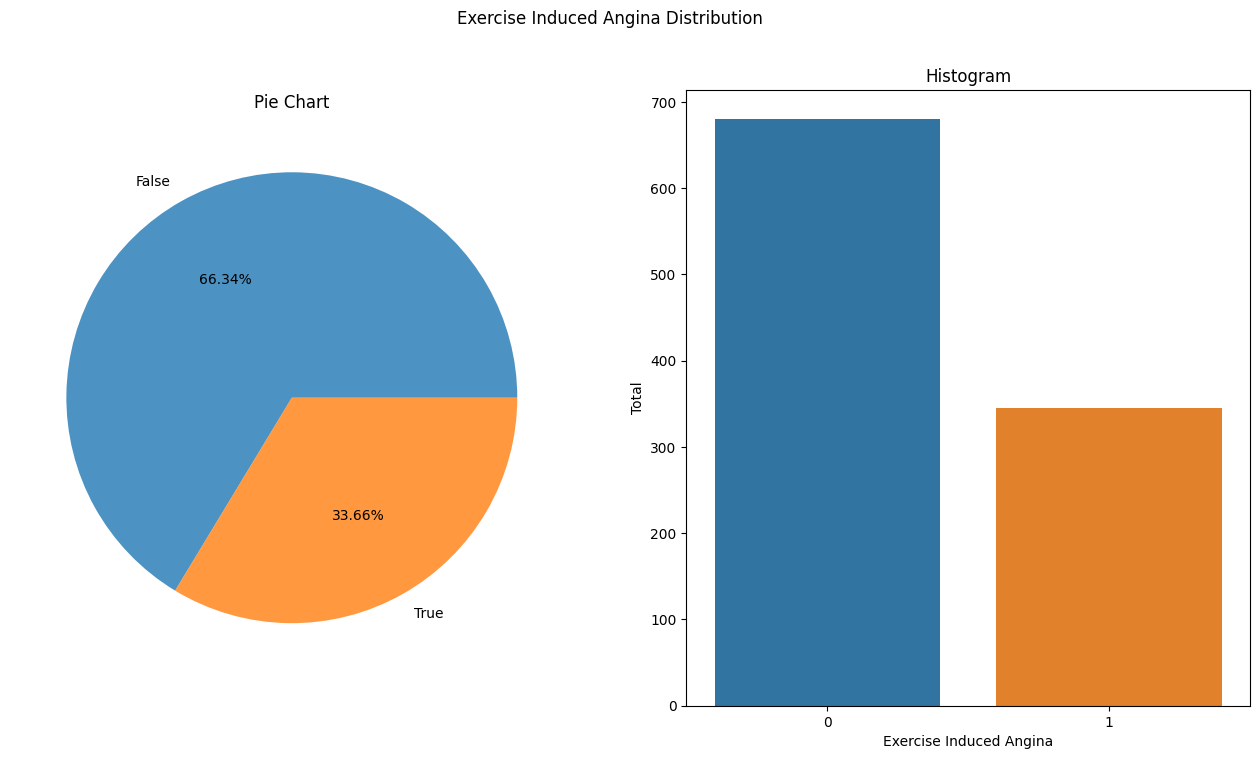

In [ ]:
labels=['False', 'True']
order=df['exang'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Exercise Induced Angina Distribution')

#subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['exang'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))

#Subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='exang',data=df,order=order)
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Total')
countplt

### slope (Slope of the Peak Exercise)

<Axes: title={'center': 'Histogram'}, xlabel='Slope', ylabel='Total'>

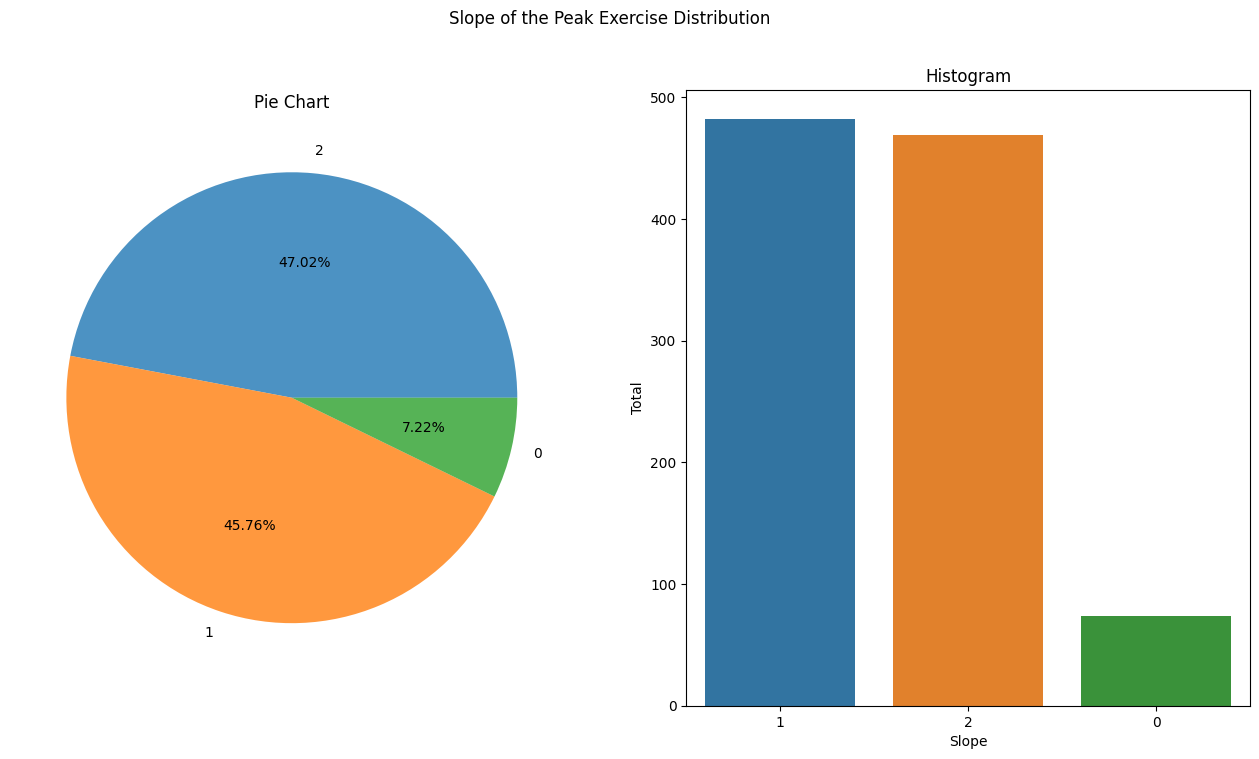

In [ ]:
labels=['2', '1', '0']
order=df['slope'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Slope of the Peak Exercise Distribution')

# Subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['slope'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))


#Subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='slope',data=df,order=order)
plt.xlabel('Slope')
plt.ylabel('Total')
countplt

### ca (Number of Major Vessels)

<Axes: title={'center': 'Histogram'}, xlabel='Number of Major Vessels', ylabel='Total'>

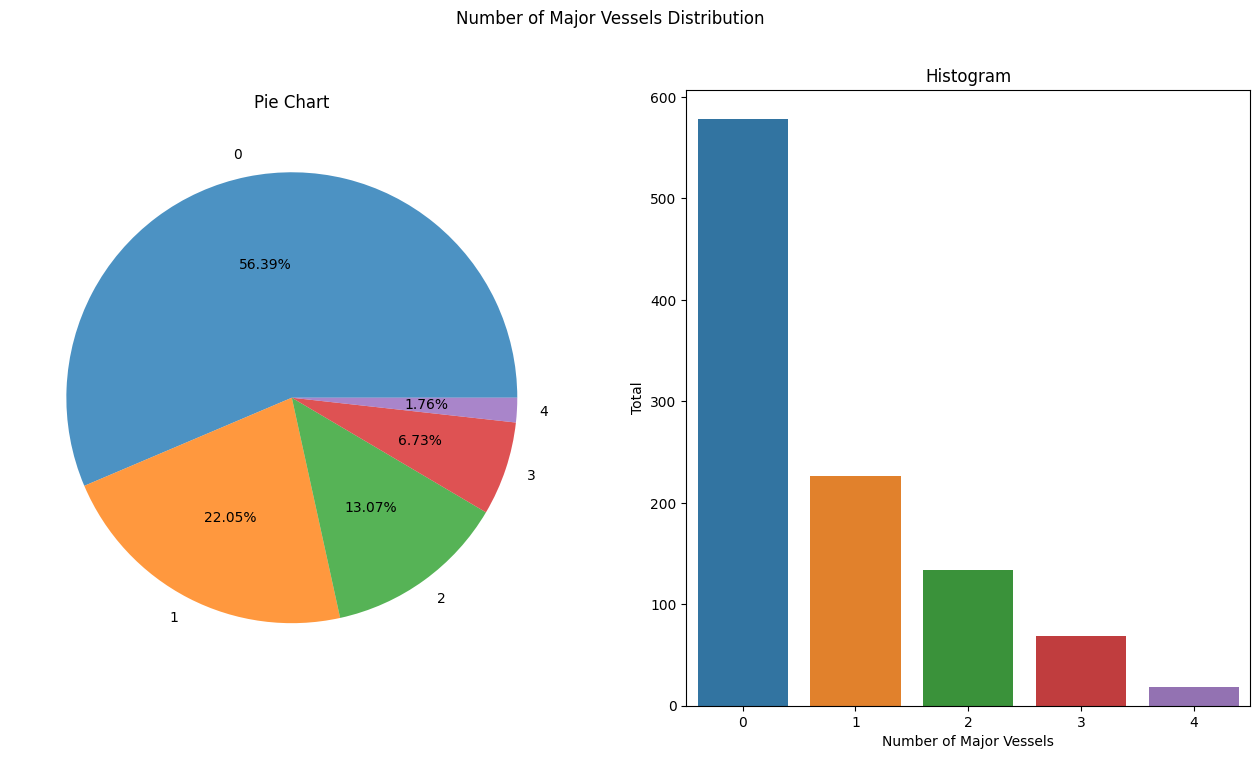

In [ ]:
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Number of Major Vessels Distribution')

# Subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['ca'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))

#Subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='ca',data=df,order=order)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Total')
countplt

### thal

<Axes: title={'center': 'Histogram'}, xlabel='Number of "thal"', ylabel='Total'>

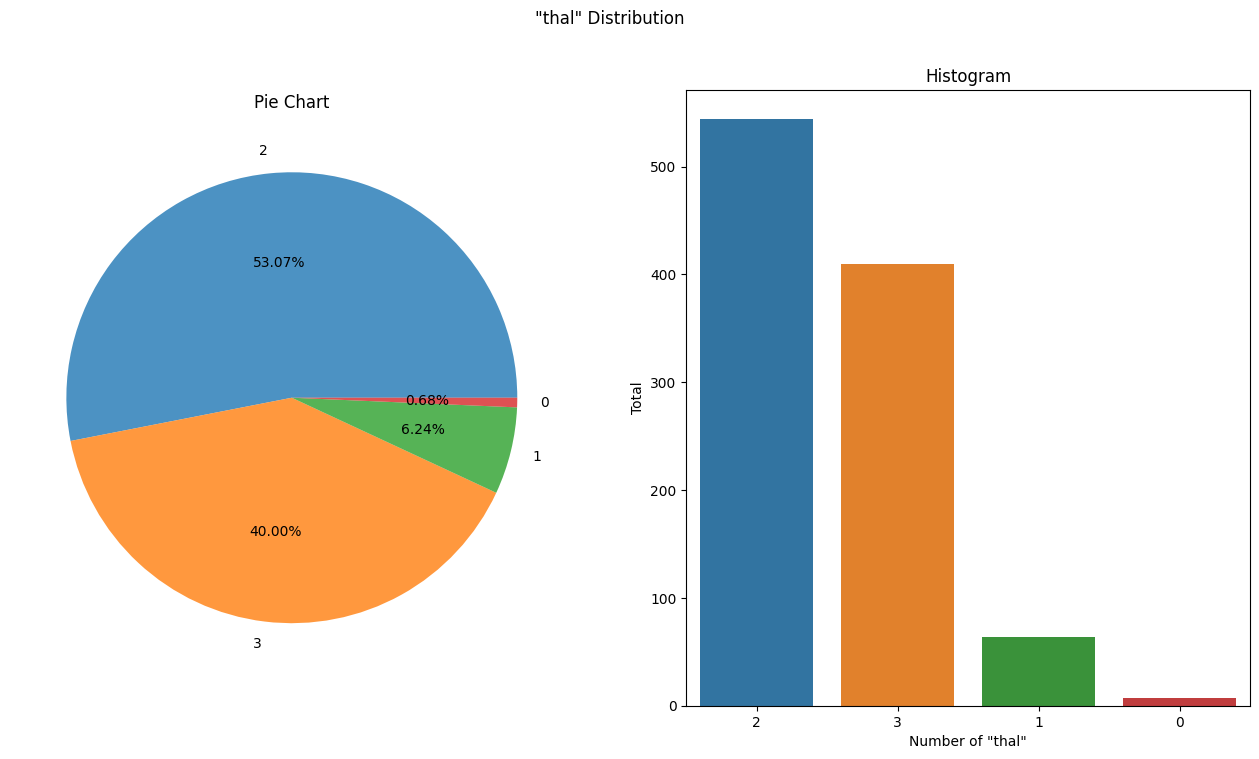

In [ ]:
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('"thal" Distribution')

# Subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['thal'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))

#Subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='thal',data=df,order=order)
plt.xlabel('Number of "thal"')
plt.ylabel('Total')
countplt

### target (Heart Disease Status)

<Axes: title={'center': 'Histogram'}, xlabel='Heart Disease Status', ylabel='Total'>

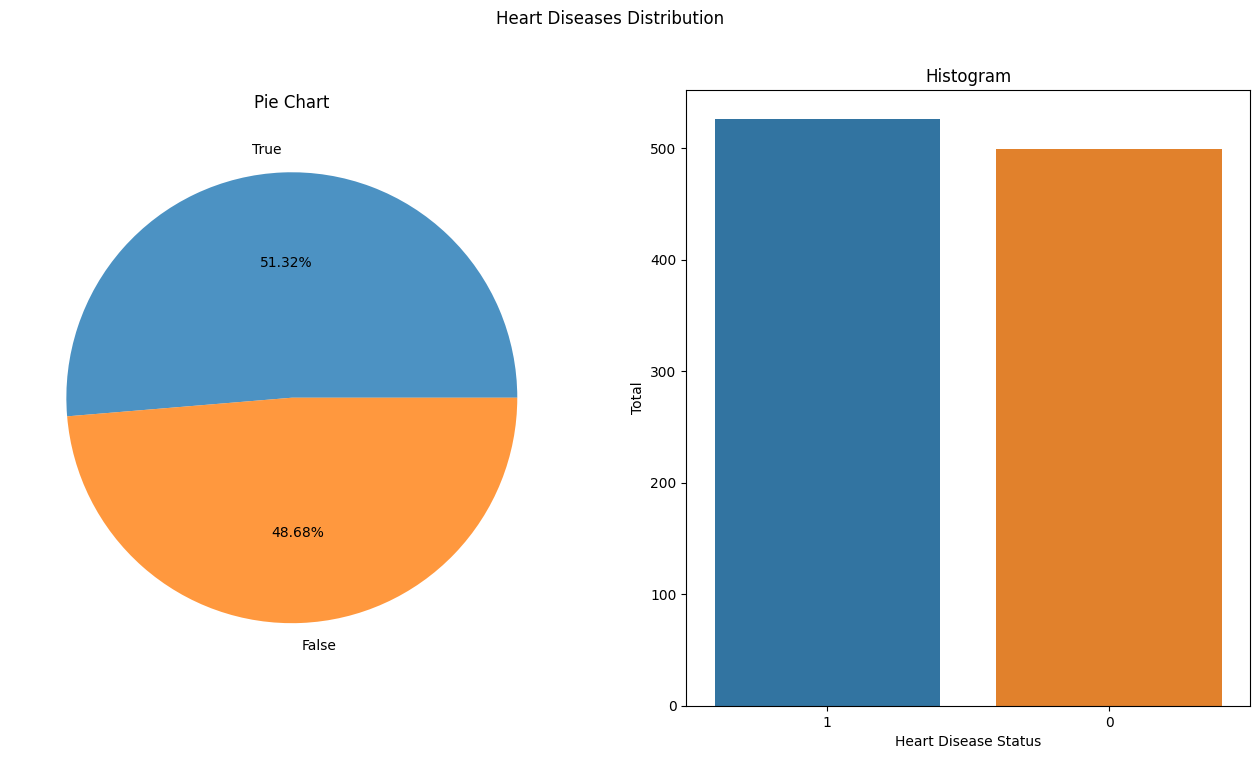

In [ ]:
labels=['True', 'False']
order=df['target'].value_counts().index

plt.figure(figsize= (16,8))
plt.suptitle('Heart Diseases Distribution')

# Subplot 1
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))

#Subplot 2
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='target',data=df,order=order)
plt.xlabel('Heart Disease Status')
plt.ylabel('Total')
countplt

## Heart Disease Distribution based on Gender

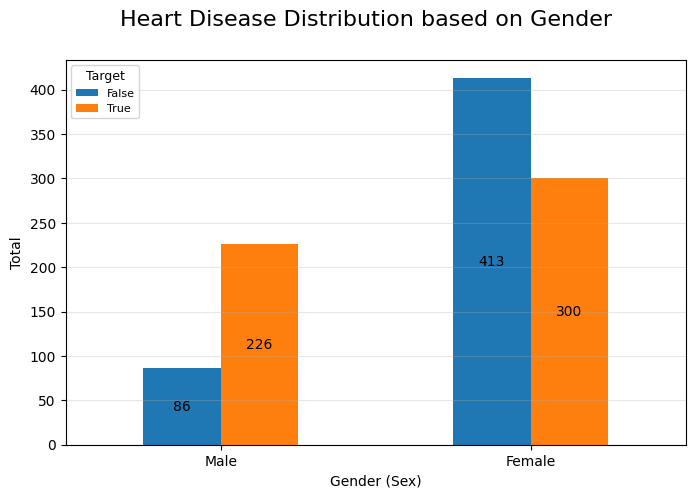

In [ ]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# Bar Chart
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5))

for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2,'{:.0f}'.format(height), horizontalalignment='center',verticalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontsize='16')
plt.xlabel('Gender (Sex)')
plt.ylabel('Total')

plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(labels=labels, title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True);

Females tend to have heart diseases more frequently compared to males. In males, the distribution is more imbalanced compared to females.

## Heart Disease Distribution Based on Major Vessels Total

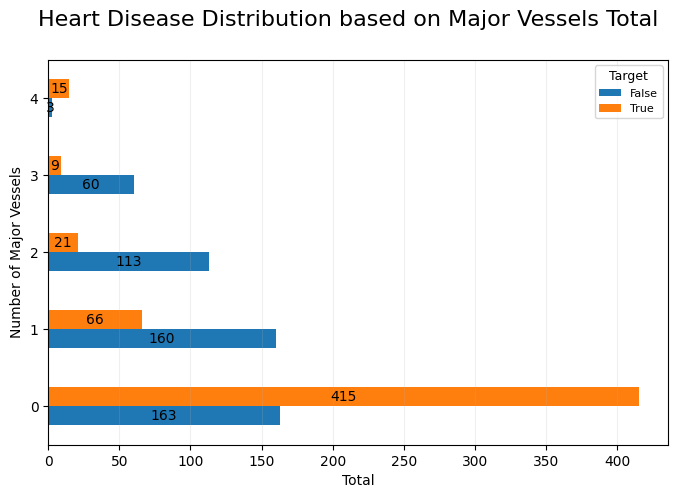

In [ ]:
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5))

for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), horizontalalignment='center', verticalalignment='center')
plt.suptitle('Heart Disease Distribution based on Major Vessels Total',fontsize='16')

plt.xlabel('Total')
plt.ylabel('Number of Major Vessels')

plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.2)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='Target', fontsize='8', frameon=True,title_fontsize='9', loc='upper right');


## Heart Disease Scatter Plot Based on Age

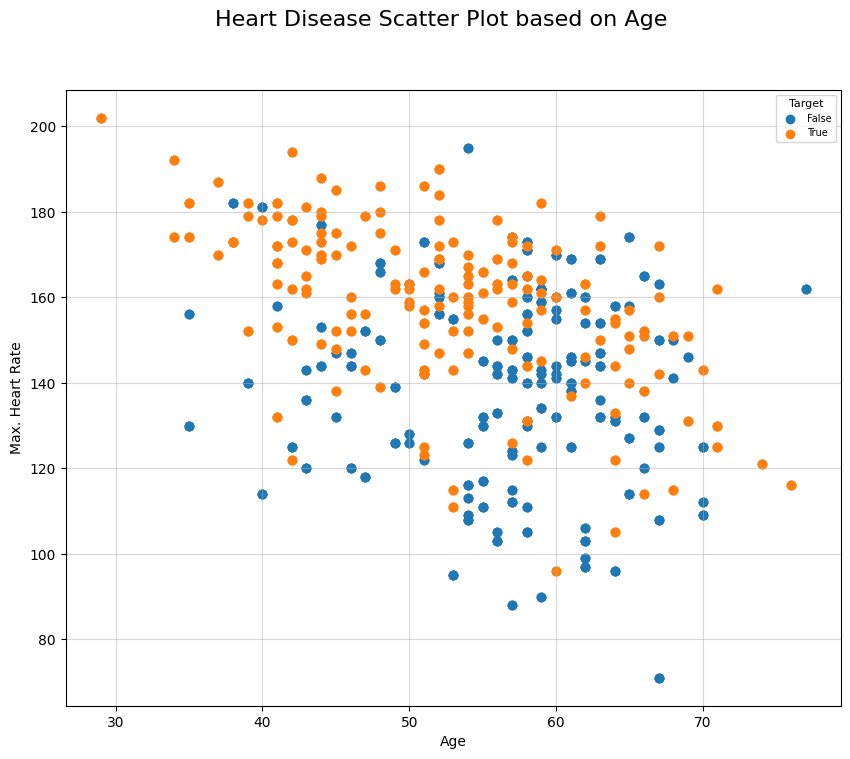

In [ ]:
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age',fontsize='16')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])

plt.legend(['False', 'True'], title='Target', fontsize='7', title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age')
plt.ylabel('Max. Heart Rate')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.5)
plt.show();

## Heart Disease Distribution Based on Fasting Blood Sugar

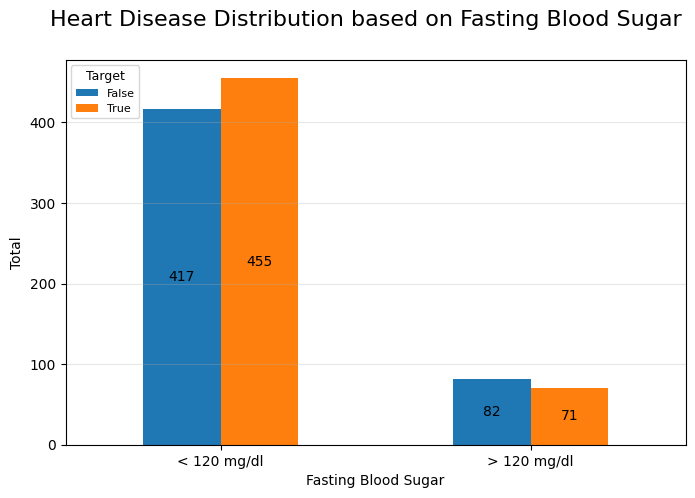

In [ ]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5))

# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height),horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar',fontsize='16')

plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(labels=labels, title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True);

The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low fasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high fasting blood sugar is equally distributed.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Preprocessing

## One-Hot Encoding

In [37]:
# categorical columns
cp = pd.get_dummies(df['cp'],prefix= 'cp')
thal = pd.get_dummies(df['thal'],prefix = 'thal')
slope = pd.get_dummies(df['slope'],prefix = 'slope')

frames = [df,cp,thal,slope]
df = pd.concat(frames,axis=1)

df['cp_1'] = df['cp_1'].astype(int)
df['cp_2'] = df['cp_2'].astype(int)
df['cp_3'] = df['cp_3'].astype(int)
df['thal_0'] = df['thal_0'].astype(int)
df['thal_1'] = df['thal_1'].astype(int)
df['thal_2'] = df['thal_2'].astype(int)
df['thal_3'] = df['thal_3'].astype(int)
df['slope_0'] = df['slope_0'].astype(int)
df['slope_1'] = df['slope_1'].astype(int)
df['slope_2'] = df['slope_2'].astype(int)


#Dropping the unnecessory variables
df=df.drop(columns = ['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [38]:
#missing values
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

In [39]:
df.isna()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df1 = df.dropna()
df1.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [14]:
df1.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,0.754146,...,0.162927,0.277073,0.075122,0.006829,0.062439,0.530732,0.400000,0.072195,0.470244,0.457561
std,9.072290,0.460373,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,1.030798,...,0.369479,0.447771,0.263717,0.082397,0.242069,0.499298,0.490137,0.258937,0.499357,0.498439
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df1.corr()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
age,1.000000,-0.103240,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,0.271551,...,-0.155137,-0.062574,0.049622,-0.018340,0.048565,-0.127881,0.109369,0.034451,0.173471,-0.191688
sex,-0.103240,1.000000,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,0.111729,...,-0.035405,-0.106842,0.083960,-0.022379,0.135659,-0.367115,0.310740,0.045260,-0.013950,-0.009537
trestbps,0.271121,-0.078974,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,0.104554,...,-0.087992,-0.054250,0.152188,-0.017106,0.076197,-0.139099,0.106942,0.113408,0.031390,-0.090362
chol,0.219823,-0.198258,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,0.074259,...,-0.011117,-0.045654,-0.049381,-0.059268,-0.085388,-0.012472,0.064841,-0.043568,0.062809,-0.040292
fbs,0.121243,0.027200,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,0.137156,...,-0.066185,0.077124,0.046805,0.098236,0.095579,-0.088882,0.026825,0.105297,-0.032623,-0.022019
restecg,-0.132696,-0.055117,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,-0.078072,...,0.072755,0.080768,-0.068686,0.006549,-0.006912,0.028947,-0.027176,-0.015732,-0.090182,0.098521
thalach,-0.390227,-0.049365,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,-0.207888,...,0.250678,0.161594,0.099348,-0.038534,-0.148055,0.284543,-0.210261,-0.065811,-0.420784,0.455748
exang,0.088163,0.139157,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,0.107849,...,-0.247159,-0.270282,-0.101175,0.041211,0.063645,-0.327249,0.295004,0.072535,0.255496,-0.293649
oldpeak,0.208137,0.084687,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,0.221816,...,-0.280812,-0.151284,0.074983,-0.035308,0.106853,-0.338063,0.297545,0.393521,0.303453,-0.508445
ca,0.271551,0.111729,0.104554,0.074259,0.137156,-0.078072,-0.207888,0.107849,0.221816,1.000000,...,-0.140878,-0.080775,-0.072098,-0.060697,0.053753,-0.207305,0.194836,-0.043198,0.135653,-0.113462


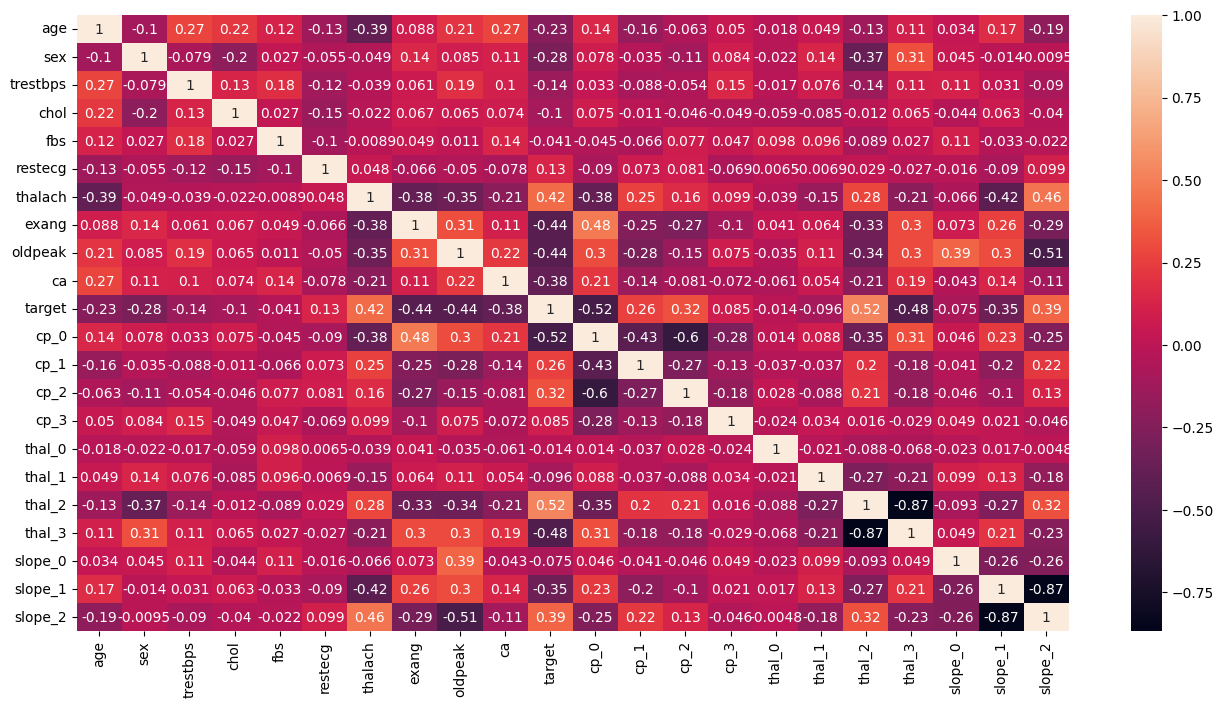

In [16]:
plt.figure(figsize= (16,8))
ax = sns.heatmap(df1.corr(), annot=True)

In [41]:
df1.drop('fbs', axis = 1, inplace=True)
df1.head()

,age,sex,trestbps,chol,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,1,168,0,1.0,2,0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,0,155,1,3.1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,1,125,1,2.6,0,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,1,161,0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,0,0,0,0,1,0,0,1,0


# Distribution Plots

<Axes: xlabel='age', ylabel='Density'>

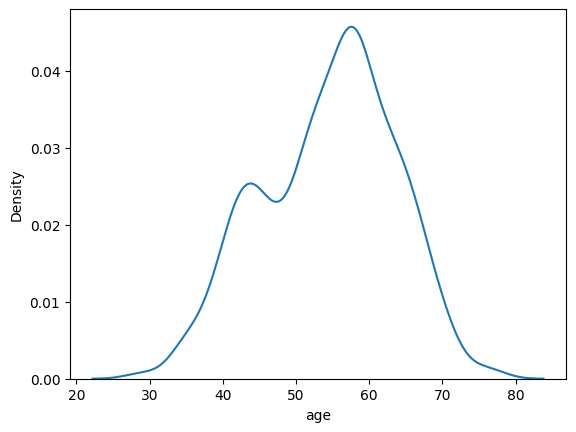

In [ ]:
sns.kdeplot(df['age'])

<Axes: xlabel='trestbps', ylabel='Density'>

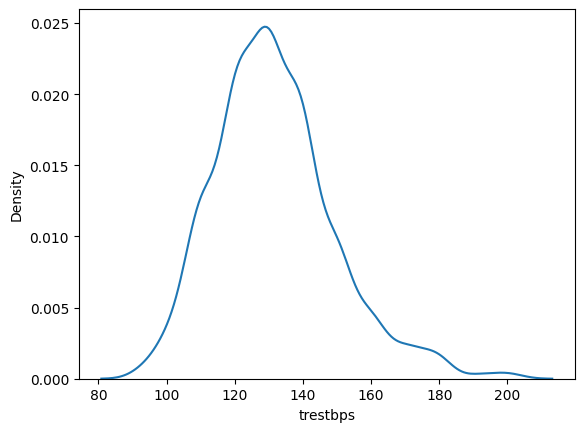

In [ ]:
sns.kdeplot(df['trestbps'])

<Axes: xlabel='chol', ylabel='Density'>

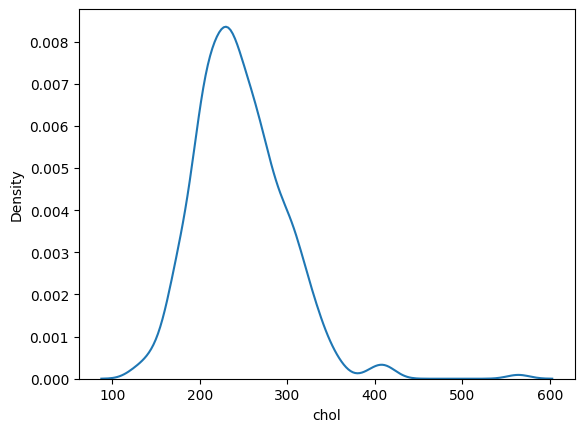

In [ ]:
sns.kdeplot(df['chol'])

<Axes: xlabel='thalach', ylabel='Density'>

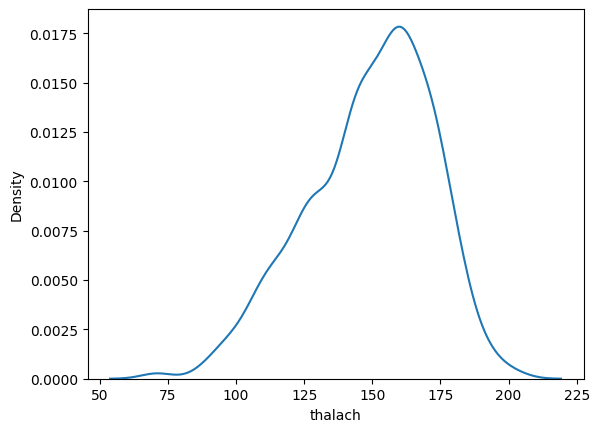

In [ ]:
sns.kdeplot(df['thalach'])

<Axes: xlabel='sex', ylabel='Density'>

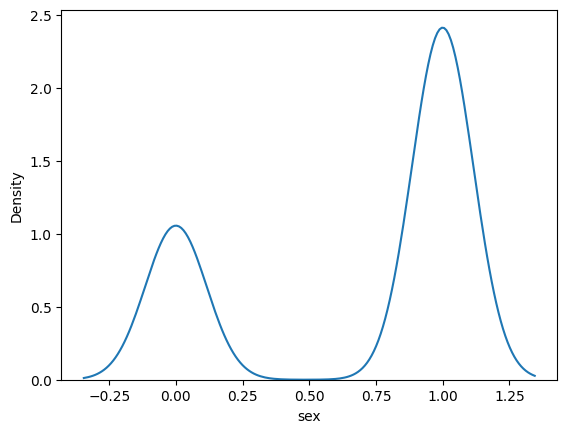

In [ ]:
sns.kdeplot(df['sex'])

# Box Plots

<Axes: ylabel='age'>

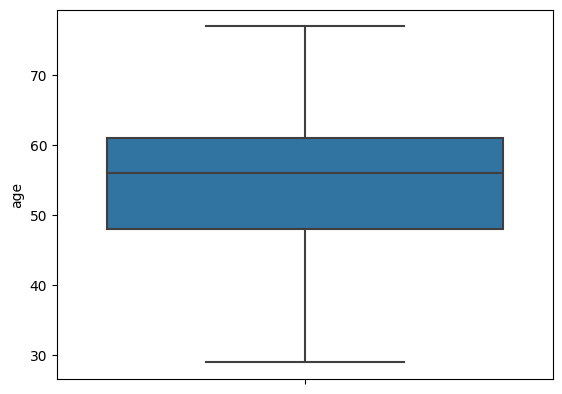

In [ ]:
sns.boxplot(y='age', data=df1)

<Axes: ylabel='trestbps'>

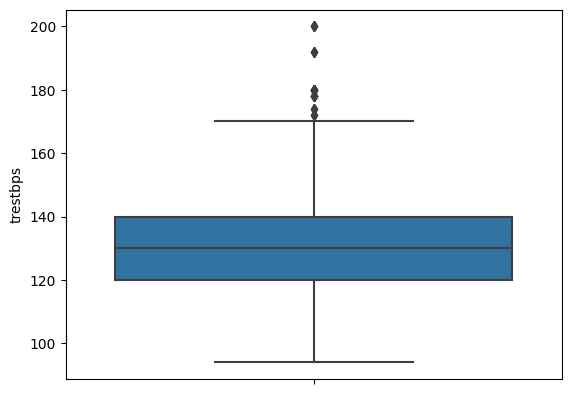

In [ ]:
sns.boxplot(y='trestbps', data=df1)

<Axes: ylabel='chol'>

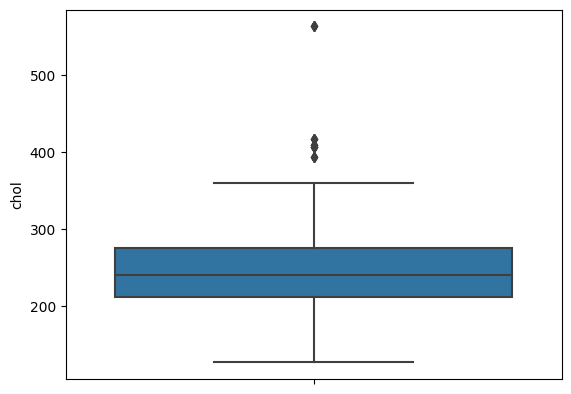

In [ ]:
sns.boxplot(y='chol', data=df1)

<Axes: ylabel='thalach'>

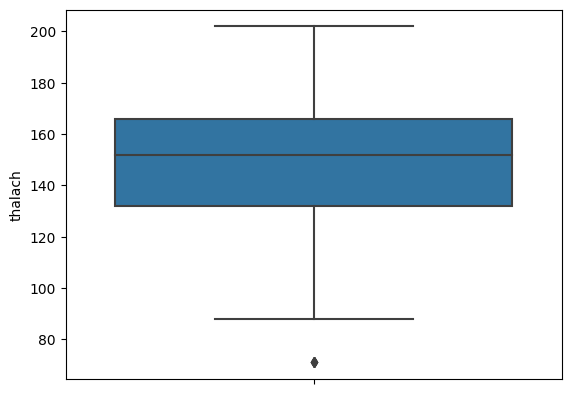

In [ ]:
sns.boxplot(y='thalach', data=df1)

<Axes: ylabel='oldpeak'>

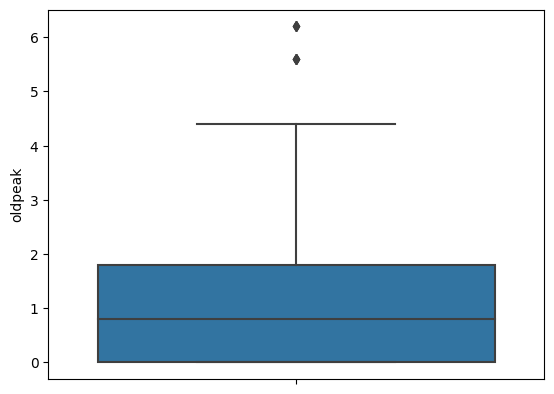

In [ ]:
sns.boxplot(y='oldpeak', data=df1)

# Logistic Regression

In [147]:
df_log = df1

In [148]:
X_log = df_log.drop('target', axis=1)
y_log = df_log['target']
print(df_log.shape, X_log.shape, y_log.shape)

(1025, 21) (1025, 20) (1025,)


In [149]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

In [150]:
# Create a logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train_log, y_train_log)

# Make predictions on the test data
y_pred_log = lr.predict(X_test_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
# building roc curve
y_true_log = y_test_log  # True labels (actual target values)
y_prob_log = lr.predict_proba(X_test_log)[:, 1]  # Predicted probabilities for the positive class


# Calculate the AUC (Area Under the Curve)
roc_auc_log = roc_auc_score(y_true_log, y_prob_log)

In [153]:
# Calculate the accuracy of the model
accuracy_log = accuracy_score(y_test_log, y_pred_log)
print(f"Accuracy percentage: {accuracy_log * 100:.2f}%")
print(f"Accuracy: {accuracy_log}")
print(f"roc_auc: {roc_auc_log}")

Accuracy percentage: 82.44%
Accuracy: 0.824390243902439
roc_auc: 0.8847325337902151


In [154]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test_log, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       102
           1       0.78      0.90      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



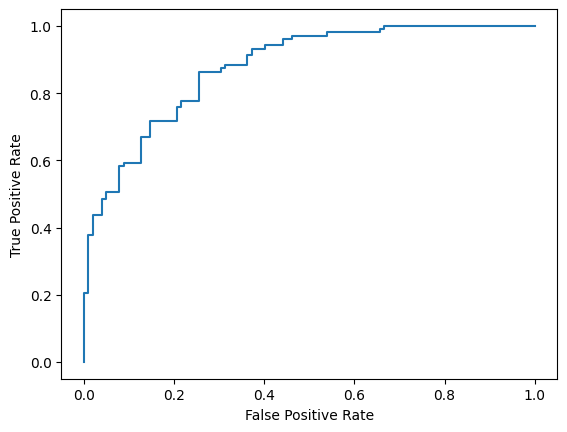

In [156]:
fpr_log, tpr_log, _ = roc_curve(y_test_log,  y_prob_log)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [158]:
tn_log, fp_log, fn_log, tp_log = confusion_matrix(y_test_log, y_pred_log).ravel()
sensitivity_log = tp_log / (tp_log + fn_log)
specificity_log = tn_log / (tn_log + fp_log)

In [159]:
print('Sensitivity (True Positive Rate):', sensitivity_log)
print('Specificity (True Negative Rate):', specificity_log)

Sensitivity (True Positive Rate): 0.9029126213592233
Specificity (True Negative Rate): 0.7450980392156863


In [160]:
# Display a confusion matrix
print("Confusion Matrix:")
cm_log = confusion_matrix(y_test_log, y_pred_log)
print(cm_log)

Confusion Matrix:
[[76 26]
 [10 93]]


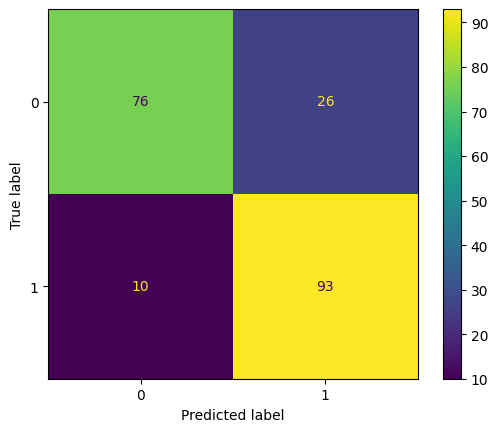

In [161]:
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot()
plt.show()

# Naive Bayes Classifier

In [162]:
df_naive = df1

In [163]:
X_nb = df_naive.drop('target', axis=1)
y_nb = df_naive['target']

In [164]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)
print(X_train_nb.shape, y_train_nb.shape, X_test_nb.shape, y_test_nb.shape)
scaler = StandardScaler()
X_train_nb = scaler.fit_transform(X_train_nb)
X_test_nb = scaler.transform(X_test_nb)

(820, 20) (820,) (205, 20) (205,)


In [165]:
nb_classifier = GaussianNB()

In [166]:
nb_classifier.fit(X_train_nb, y_train_nb)

GaussianNB()

In [167]:
y_pred_nb = nb_classifier.predict(X_test_nb)

In [168]:
# building roc curve
y_true_nb = y_test_nb  # True labels (actual target values)
y_prob_nb = nb_classifier.predict_proba(X_test_nb)[:, 1]  # Predicted probabilities for the positive class

# Calculate the AUC (Area Under the Curve)
roc_auc_nb = roc_auc_score(y_true_nb, y_prob_nb)

In [169]:
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"Accuracy percentage: {accuracy_nb * 100:.2f}%")
print(f"Accuracy: {accuracy_nb}")
print(f"roc_auc: {roc_auc_nb}")

Accuracy percentage: 70.73%
Accuracy: 0.7073170731707317
roc_auc: 0.8359032933561774


In [170]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.46      0.61       102
           1       0.64      0.95      0.77       103

    accuracy                           0.71       205
   macro avg       0.77      0.71      0.69       205
weighted avg       0.77      0.71      0.69       205



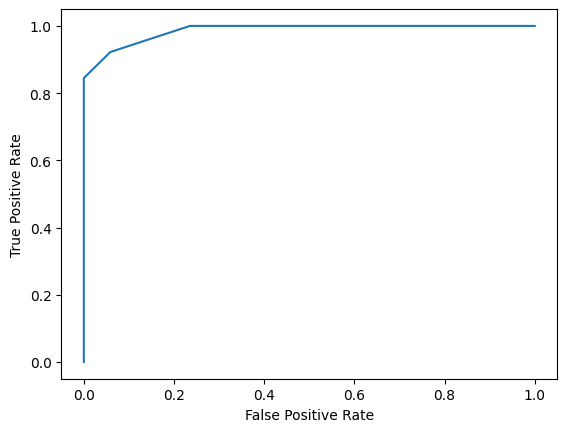

In [201]:
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb,  y_prob_nb)

#create ROC curve
plt.plot(fpr_nb,tpr_nb)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [172]:
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test_nb, y_pred_nb).ravel()
sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)

In [173]:
print('Sensitivity (True Positive Rate):', sensitivity_nb)
print('Specificity (True Negative Rate):', specificity_nb)

Sensitivity (True Positive Rate): 0.9514563106796117
Specificity (True Negative Rate): 0.46078431372549017


In [174]:
# Display a confusion matrix
print("Confusion Matrix:")
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
print(cm_nb)

Confusion Matrix:
[[47 55]
 [ 5 98]]


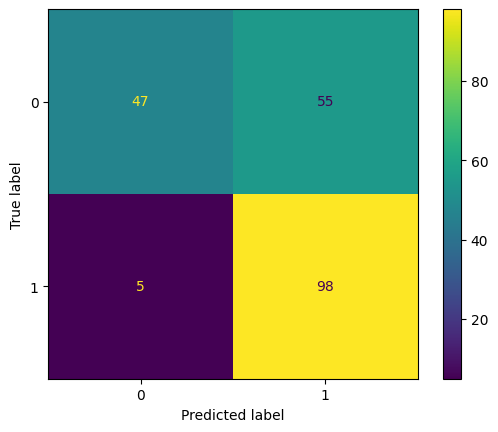

In [175]:
disp_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
disp_nb.plot()
plt.show()

# K Nearest Neighbors

In [43]:
df_knn = df1

KNN (k=3)
Cross-Validation Mean Score: 0.8907317073170733
Test Set Accuracy Percentage: 93.17073170731707
Test Set Accuracy: 0.9317073170731708
ROC AUC: 0.9862935465448315
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       102
           1       0.94      0.92      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

Confusion Matrix:
 [[96  6]
 [ 8 95]]


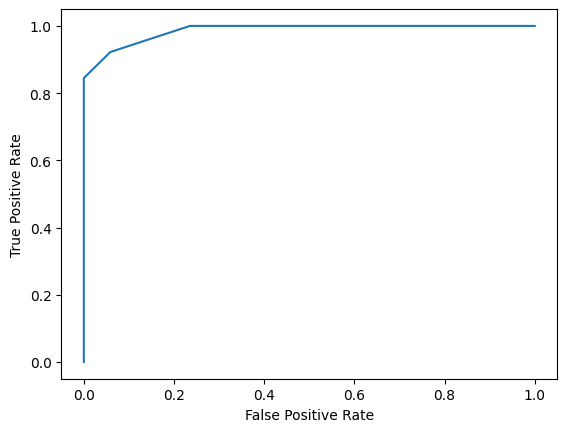

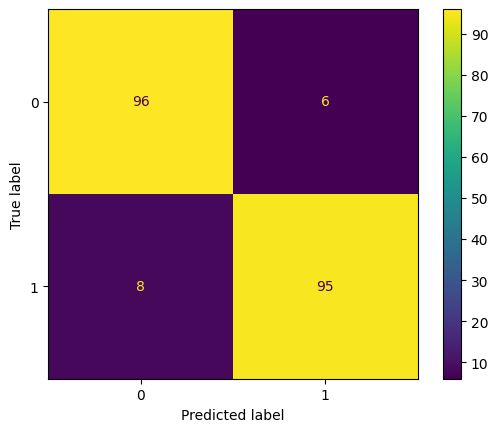



KNN (k=5)
Cross-Validation Mean Score: 0.7453658536585366
Test Set Accuracy Percentage: 85.85365853658537
Test Set Accuracy: 0.8585365853658536
ROC AUC: 0.9574528840662477
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       102
           1       0.82      0.91      0.87       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

Confusion Matrix:
 [[82 20]
 [ 9 94]]


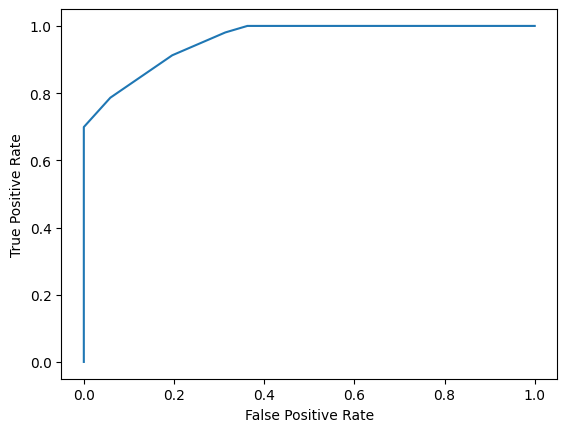

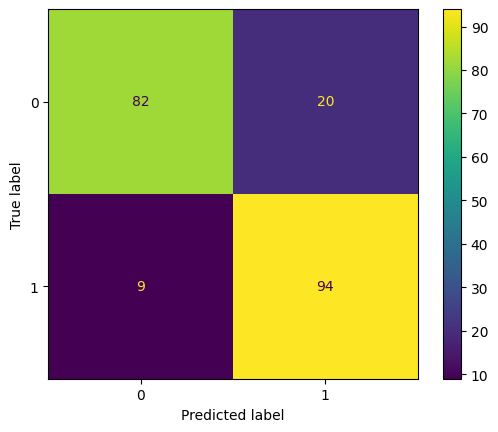



KNN (k=7)
Cross-Validation Mean Score: 0.7170731707317073
Test Set Accuracy Percentage: 85.36585365853658
Test Set Accuracy: 0.8536585365853658
ROC AUC: 0.9344660194174758
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.85       102
           1       0.82      0.90      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

Confusion Matrix:
 [[82 20]
 [10 93]]


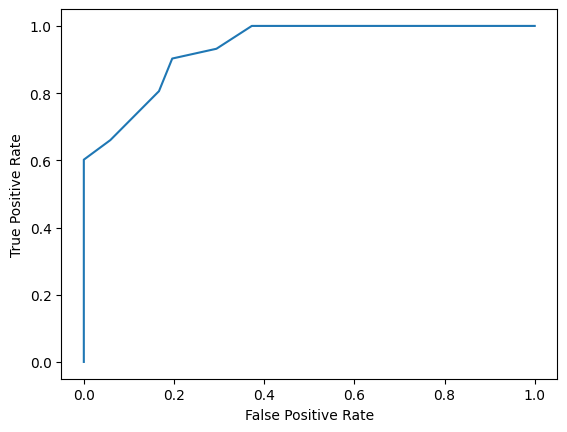

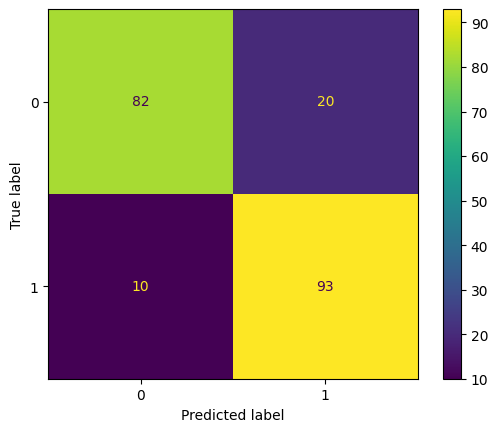



Best k: 3
Performance Metrics for the Best k:
Cross-Validation Mean Score: 0.8907317073170733
Test Set Accuracy Percentage: 93.17073170731707
Test Set Accuracy: 0.9317073170731708
ROC AUC: 0.9862935465448315
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       102
           1       0.94      0.92      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

Confusion Matrix:
 [[96  6]
 [ 8 95]]


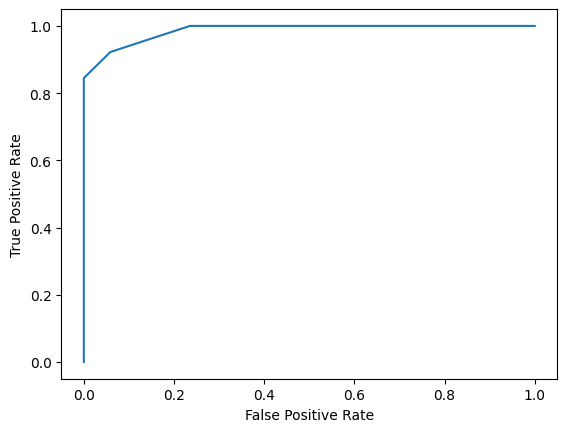

In [181]:
X_knn = df_knn.drop('target', axis=1)
y_knn = df_knn['target']

# Define a list of k values to test
k_values = [3, 5, 7]

# Create a dictionary to store the results for each k
results = {}

# Perform cross-validation and evaluation for each value of k
for k in k_values:
    # Create a KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation with 5 folds
    cross_val_scores = cross_val_score(knn_classifier, X_knn, y_knn, cv=5)
    mean_score = cross_val_scores.mean()

    # Split the dataset for final evaluation
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_knn = scaler.fit_transform(X_train_knn)
    X_test_knn = scaler.transform(X_test_knn)
    knn_classifier.fit(X_train_knn, y_train_knn)  # Corrected line
    y_pred_knn = knn_classifier.predict(X_test_knn)

    # Calculate additional metrics

    # building roc curve
    y_true_knn = y_test_knn  # True labels (actual target values)
    y_prob_knn = knn_classifier.predict_proba(X_test_knn)[:, 1]  # Predicted probabilities for the positive class

    # Calculate the AUC (Area Under the Curve)
    roc_auc_knn = roc_auc_score(y_true_knn, y_prob_knn)
    accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
    confusion_matrix_result_knn = confusion_matrix(y_test_knn, y_pred_knn)
    classification_report_result_knn = classification_report(y_test_knn, y_pred_knn)

    # Calculate ROC curve and AUC
    fpr_knn, tpr_knn, _ = roc_curve(y_test_knn,  y_prob_knn)

    # Store the results in the dictionary
    results[k] = {
        "Cross-Validation Mean Score": mean_score,
        "Accuracy percentage": accuracy_knn * 100,
        "Accuracy": accuracy_knn,
        "ROC AUC": roc_auc_knn,
        "Classification Report": classification_report_result_knn,
        "Confusion Matrix": confusion_matrix_result_knn,
        "FPR": fpr_knn,
        "TPR": tpr_knn
    }

# Find the best k based on mean cross-validation score
best_k = max(results, key=lambda k: results[k]["Cross-Validation Mean Score"])

# Print the results for all values of k
for k in k_values:
    print(f'KNN (k={k})')
    print(f'Cross-Validation Mean Score: {results[k]["Cross-Validation Mean Score"]}')
    print(f'Test Set Accuracy Percentage: {results[k]["Accuracy percentage"]}')
    print(f'Test Set Accuracy: {results[k]["Accuracy"]}')
    print('ROC AUC:', results[k]['ROC AUC'])
    print('Classification Report:\n', results[k]['Classification Report'])
    print('Confusion Matrix:\n', results[k]['Confusion Matrix'])
    #create ROC curve
    plt.plot(results[k]["FPR"],results[k]["TPR"])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    disp_knn = ConfusionMatrixDisplay(confusion_matrix=results[k]['Confusion Matrix'])
    disp_knn.plot()
    plt.show()
    print('\n')

# Print the best k and its results
print(f'Best k: {best_k}')
print('Performance Metrics for the Best k:')
best_results = results[best_k]
print(f'Cross-Validation Mean Score: {best_results["Cross-Validation Mean Score"]}')
print(f'Test Set Accuracy Percentage: {best_results["Accuracy percentage"]}')
print(f'Test Set Accuracy: {best_results["Accuracy"]}')
print('ROC AUC:', best_results['ROC AUC'])
print('Classification Report:\n', best_results['Classification Report'])
print('Confusion Matrix:\n', best_results['Confusion Matrix'])
plt.plot(best_results["FPR"],best_results["TPR"])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Trees and Random Forests

In [46]:
df_dt = df1

In [47]:
y_dt = df_dt['target'].iloc[2:]
X_dt = df_dt.drop(df['target'])
print(df_dt.shape, X_dt.shape, y_dt.shape)

(1025, 22) (1023, 21) (1023,)


In [182]:
X_dt = df_dt.drop(['target'], axis=1)  # Exclude 'target'
y_dt = df_dt['target']

In [49]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_dt = scaler.fit_transform(X_train_dt)
X_test_dt = scaler.transform(X_test_dt)

In [50]:
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_clf.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test_dt)

Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# building roc curve
y_true_dt = y_test_nb  # True labels (actual target values)
y_prob_dt = dt_clf.predict_proba(X_test_dt)[:, 1]  # Predicted probabilities for the positive class

# Calculate the AUC (Area Under the Curve)
roc_auc_dt = roc_auc_score(y_true_nb, y_prob_nb)

In [ ]:
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"Accuracy percentage: {accuracy_nb * 100:.2f}%")
print(f"Accuracy: {accuracy_nb}")
print(f"roc_auc: {roc_auc_nb}")

In [ ]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_nb))

In [ ]:
fpr_log, tpr_log, _ = roc_curve(y_test_log,  y_prob_log)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test_nb, y_pred_nb).ravel()
sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)

In [ ]:
print('Sensitivity (True Positive Rate):', sensitivity_nb)
print('Specificity (True Negative Rate):', specificity_nb)

In [ ]:
# Display a confusion matrix
print("Confusion Matrix:")
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
print(cm_nb)

In [ ]:
disp_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
disp_nb.plot()
plt.show()

In [51]:
# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)  # You can adjust the number of estimators as needed

# Fit the Random Forest classifier to the training data
rf_clf.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test_dt)

Random Forest Classifier Results:
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# building roc curve
y_true_rf = y_test_rf  # True labels (actual target values)
y_prob_rf = rf_clf.predict_proba(X_test_nb)[:, 1]  # Predicted probabilities for the positive class

# Calculate the AUC (Area Under the Curve)
roc_auc_rf = roc_auc_score(y_true_rf, y_prob_rf)

In [ ]:
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Accuracy percentage: {accuracy_rf * 100:.2f}%")
print(f"Accuracy: {accuracy_rf}")
print(f"roc_auc: {roc_auc_rf}")

In [ ]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf,  y_prob_rf)

#create ROC curve
plt.plot(fpr_rf,tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test_rf, y_pred_rf).ravel()
sensitivity_rf = tp_rf / (tp_rf + fn_rf)
specificity_rf = tn_nb / (tn_rf + fp_rf)

In [ ]:
print('Sensitivity (True Positive Rate):', sensitivity_rf)
print('Specificity (True Negative Rate):', specificity_rf)

In [ ]:
# Display a confusion matrix
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
print(cm_rf)

In [ ]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
disp_rf.plot()
plt.show()

# Support Vector Machines

In [53]:
df_svm = df1

In [211]:
X_svm = df_svm.drop('target', axis=1)
y_svm = df_svm['target']

In [212]:
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X_svm,y_svm, test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

In [213]:
X_train_svm.shape, X_test_svm.shape

((820, 20), (205, 20))

In [214]:
SVMmodel = SVC()

# Training SVM
SVMmodel.fit(X_train_svm, y_train_svm)

#Predicting y for test dataset
y_pred_svm = SVMmodel.predict(X_test_svm)

In [220]:
# building roc curve
y_true_svm = y_test_svm  # True labels (actual target values)
y_prob_svm = SVMmodel.predict(X_test_svm).ravel() # Predicted probabilities for the positive class

# Calculate the AUC (Area Under the Curve)
roc_auc_svm = roc_auc_score(y_true_svm, y_prob_svm)

In [221]:
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"Accuracy percentage: {accuracy_svm * 100:.2f}%")
print(f"Accuracy: {accuracy_svm}")
print(f"roc_auc: {roc_auc_svm}")

Accuracy percentage: 85.85%
Accuracy: 0.8585365853658536
roc_auc: 0.8583666476299258


In [222]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test_svm, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       102
           1       0.84      0.89      0.86       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



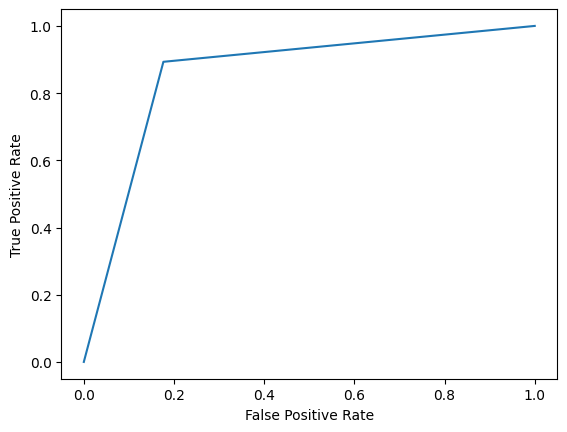

In [223]:
fpr_svm, tpr_svm, _ = roc_curve(y_test_svm,  y_prob_svm)

#create ROC curve
plt.plot(fpr_svm,tpr_svm)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [224]:
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test_svm, y_pred_svm).ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

In [225]:
print('Sensitivity (True Positive Rate):', sensitivity_svm)
print('Specificity (True Negative Rate):', specificity_svm)

Sensitivity (True Positive Rate): 0.9514563106796117
Specificity (True Negative Rate): 0.46078431372549017


In [226]:
# Display a confusion matrix
print("Confusion Matrix:")
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
print(cm_)svm

Confusion Matrix:
[[47 55]
 [ 5 98]]


In [ ]:
disp_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
disp_svm.plot()
plt.show()

# Artificial Neural Networks

In [183]:
df_nn = df1

In [184]:
y_nn = df_nn['target']
X_nn = df_nn.drop('target', axis = 1)
print(df_nn.shape, X_nn.shape, y_nn.shape)

(1025, 21) (1025, 20) (1025,)


In [185]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2,random_state=42)
print(X_train_nn.shape, y_train_nn.shape, X_test_nn.shape, y_test_nn.shape)
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

(820, 20) (820,) (205, 20) (205,)


In [186]:
neural_network = keras.Sequential([layers.Dense(units=256, activation='relu'),
                          layers.Dense(units=128, activation='relu'),
                          layers.Dense(units=1, activation='sigmoid')])

In [187]:
neural_network.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [188]:
history = neural_network.fit(
    X_train_nn,
    y_train_nn,
    validation_data=(X_test_nn, y_test_nn),
    batch_size=256,
    epochs=100
)

Epoch 1/100
4/4 [==============================] - 1s 61ms/step - loss: 0.6147 - binary_accuracy: 0.7171 - val_loss: 0.5205 - val_binary_accuracy: 0.8049
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4371 - binary_accuracy: 0.8512 - val_loss: 0.4487 - val_binary_accuracy: 0.8341
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3603 - binary_accuracy: 0.8744 - val_loss: 0.4311 - val_binary_accuracy: 0.8293
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3305 - binary_accuracy: 0.8793 - val_loss: 0.4320 - val_binary_accuracy: 0.8293
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3145 - binary_accuracy: 0.8744 - val_loss: 0.4319 - val_binary_accuracy: 0.8049
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2997 - binary_accuracy: 0.8744 - val_loss: 0.4214 - val_binary_accuracy: 0.8098
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.28

Best Validation Loss: 0.2171
Best Validation Accuracy: 0.9707


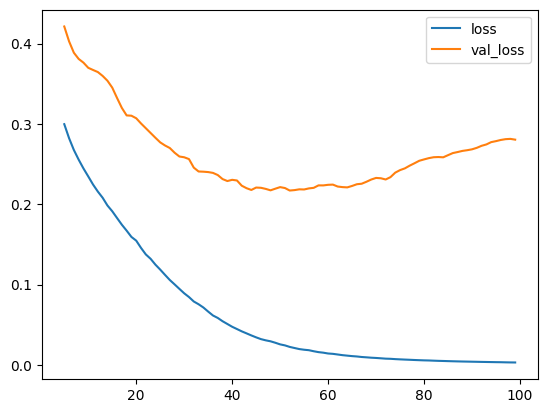

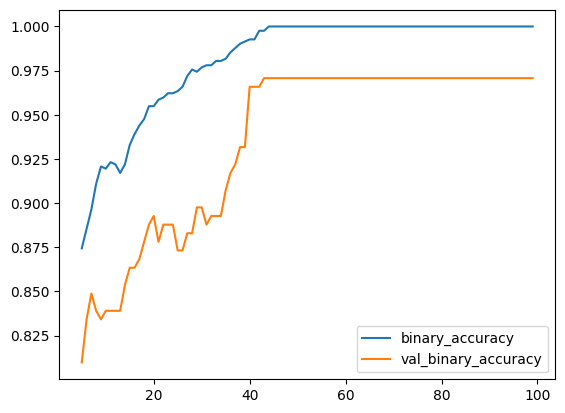

In [189]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [190]:
#Predicting y for test dataset
preds = neural_network.predict(X_test_nn)
y_pred_nn = [int(round(x[0])) for x in preds]

7/7 [==============================] - 0s 2ms/step


In [194]:
# building roc curve
y_true_nn = y_test_nn  # True labels (actual target values)
# y_prob_nn = neural_network.predict_proba(X_test_nb)[:, 1]  # Predicted probabilities for the positive class
y_prob_nn = neural_network.predict(X_test).ravel()
# Calculate the AUC (Area Under the Curve)
roc_auc_nn = roc_auc_score(y_true_nn, y_prob_nn)

7/7 [==============================] - 0s 2ms/step


In [197]:
accuracy_nn = accuracy_score(y_test_nn, y_pred_nn)
print(f"Accuracy percentage: {accuracy_nn * 100:.2f}%")
print(f"Accuracy: {accuracy_nn}")
print(f"roc_auc: {roc_auc_nn}")

Accuracy percentage: 97.07%
Accuracy: 0.9707317073170731
roc_auc: 0.9720159908623642


In [198]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test_nn, y_pred_nn))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       102
           1       1.00      0.94      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



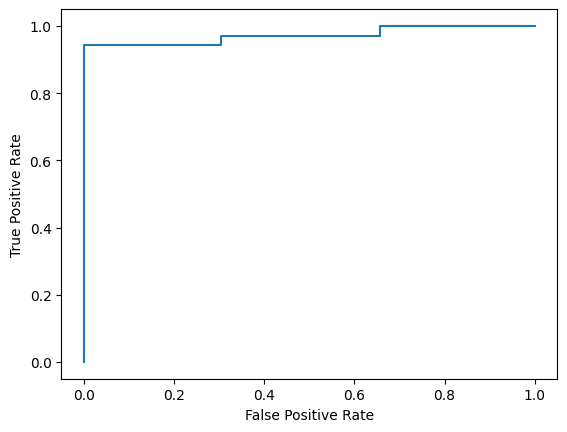

In [203]:
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn,  y_prob_nn)

#create ROC curve
plt.plot(fpr_nn,tpr_nn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [205]:
tn_nn, fp_nn, fn_nn, tp_nn = confusion_matrix(y_test_nn, y_pred_nn).ravel()
sensitivity_nn = tp_nn / (tp_nn + fn_nn)
specificity_nn = tn_nn / (tn_nn + fp_nn)

In [207]:
print('Sensitivity (True Positive Rate):', sensitivity_nn)
print('Specificity (True Negative Rate):', specificity_nn)

Sensitivity (True Positive Rate): 0.941747572815534
Specificity (True Negative Rate): 1.0


In [208]:
# Display a confusion matrix
print("Confusion Matrix:")
cm_nn = confusion_matrix(y_test_nn, y_pred_nn)
print(cm_nn)

Confusion Matrix:
[[47 55]
 [ 5 98]]


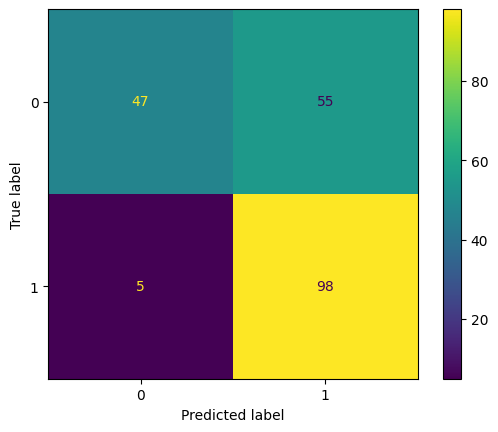

In [200]:
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_nn.plot()
plt.show()